keras 모델을 이용해서 2022년 예측 !

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train데이터와 test를 만드는 건 선형회귀 모델에서 다룸 ! 
train_x = pd.read_csv("data/train_x.csv")
train_y = pd.read_csv("data/train_y.csv")
test = pd.read_csv("data/test.csv")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [ ]:
# epochs를 얼마로 두냐는 .. 추가로 공부한 뒤에 다시 해보겠!
history1 = model1.fit(train_x, train_y, epochs= 24, validation_split=0.2)

Epoch 1/24
1046/1046 [==============================] - 6s 6ms/step - loss: 6219077.5000 - mse: 6219077.5000 - val_loss: 1444600.7500 - val_mse: 1444600.7500
Epoch 2/24
1046/1046 [==============================] - 3s 3ms/step - loss: 6195889.5000 - mse: 6195889.5000 - val_loss: 1590970.8750 - val_mse: 1590970.8750
Epoch 3/24
1046/1046 [==============================] - 3s 2ms/step - loss: 6173122.0000 - mse: 6173122.0000 - val_loss: 1797899.0000 - val_mse: 1797899.0000
Epoch 4/24
1046/1046 [==============================] - 3s 3ms/step - loss: 6215609.5000 - mse: 6215609.5000 - val_loss: 1792845.3750 - val_mse: 1792845.3750
Epoch 5/24
1046/1046 [==============================] - 3s 3ms/step - loss: 6237521.5000 - mse: 6237521.5000 - val_loss: 2194720.5000 - val_mse: 2194720.5000
Epoch 6/24
1046/1046 [==============================] - 3s 3ms/step - loss: 6216214.5000 - mse: 6216214.5000 - val_loss: 1520283.7500 - val_mse: 1520283.7500
Epoch 7/24
1046/1046 [==============================

In [ ]:
y_pred_deep1 = model1.predict(test)

48/48 [==============================] - 0s 2ms/step


In [ ]:
# 2022년 1월 2월 데이터 예측 -> 1416시간 
y_pred_deep1 = y_pred_deep1[:1416]

In [ ]:
# 1월 1,2일 -2000
y_pred_deep1[0:48] = y_pred_deep1[0:48] - 2000

In [ ]:
# 모든 그래프는 명절 설날에 총생활인구수가 급감하는 경향을 보이는데 예측된 그래프만 그렇지 않다는 것을 확인 할 수 있음 
# 설날 명절에 맞춰 데이터 변경
y_pred_deep1[720-24-24:720-24] = y_pred_deep1[720-24-24:720-24] - 2000
y_pred_deep1[720-24:720] = y_pred_deep1[720-24:720] - 3000 # 1월 30일
y_pred_deep1[720:720+24] = y_pred_deep1[720:720+24] - 3500 # 1월 31일 
y_pred_deep1[720+24:720+24+24] = y_pred_deep1[720+24:720+24+24] - 3000 # 2월 1일 
y_pred_deep1[720+(24*2):720+(24*3)] = y_pred_deep1[720+(24*2):720+(24*3)] - 2000 # 2월 2일

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid') 

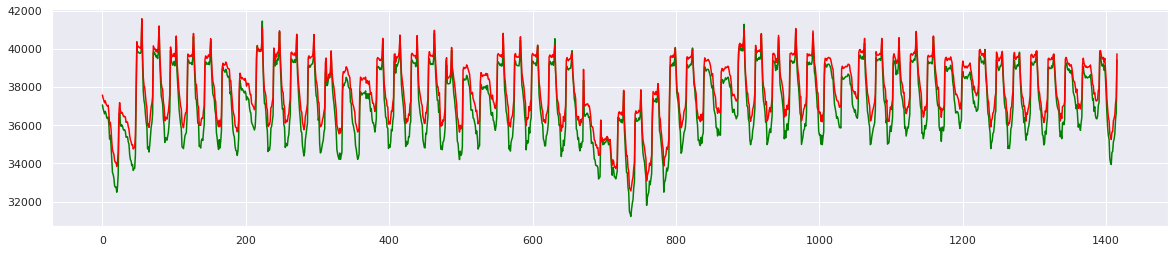

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(y_pred_deep1, color='green')
#plt.plot(submission_14['count'], color='red')

In [ ]:
y_pred_deep1 = pd.DataFrame(y_pred_deep1)
y_pred_deep1.to_csv('y_pred_deep1.csv', index = False)